In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math

### Ecuaciones pasadas

In [31]:
def rk4(f, u0, t0, tf, h):
    # Inicializar arrays de tiempo y solución
    t = np.arange(t0, tf, h)
    u = np.zeros((len(t), len(u0)))
    u[0] = u0
    
    # Iterar con RK4
    for i in range(0, len(t) - 1):
        k1 = h * f(u[i], t[i])
        k2 = h * f(u[i] + k1/2, t[i] + h/2)
        k3 = h * f(u[i] + k2/2, t[i] + h/2)
        k4 = h * f(u[i] + k3, t[i] + h)
        
        u[i + 1] = u[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
    
    return t, u

# b)

In [32]:
def f(u, t, gm):
    x1, vx1, y1, vy1, x2, vx2, y2, vy2, x3, vx3, y3, vy3 = u

    r12 = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    r13 = np.sqrt((x1 - x3)**2 + (y1 - y3)**2)
    r23 = np.sqrt((x2 - x3)**2 + (y2 - y3)**2)
    
    ax1 = gm * ((x2 - x1) / r12**3 + (x3 - x1) / r13**3)
    ay1 = gm * ((y2 - y1) / r12**3 + (y3 - y1) / r13**3)
    ax2 = gm * ((x1 - x2) / r12**3 + (x3 - x2) / r23**3)
    ay2 = gm * ((y1 - y2) / r12**3 + (y3 - y2) / r23**3)
    ax3 = gm * ((x1 - x3) / r13**3 + (x2 - x3) / r23**3)
    ay3 = gm * ((y1 - y3) / r13**3 + (y2 - y3) / r23**3)
    
    return np.array([vx1, ax1, vy1, ay1, vx2, ax2, vy2, ay2, vx3, ax3, vy3, ay3])

# c)

## Euler

In [33]:
# Condiciones iniciales para la solución de Euler
v = 0.8
u0_euler = [0, 0, 0, 0, 1, 0, 0, v, -1, 0, 0, -v]
gm = 1

# Parámetros de integración
t0, tf, h = 0, 10, 0.01

In [34]:
t_euler, u_euler = rk4(lambda u, t: f(u, t, gm), u0_euler, t0, tf, h)

# Extrayendo posiciones para graficar
x1_euler, y1_euler = u_euler[:,0], u_euler[:,1]
x2_euler, y2_euler = u_euler[:,4], u_euler[:,5]
x3_euler, y3_euler = u_euler[:,8], u_euler[:,9]

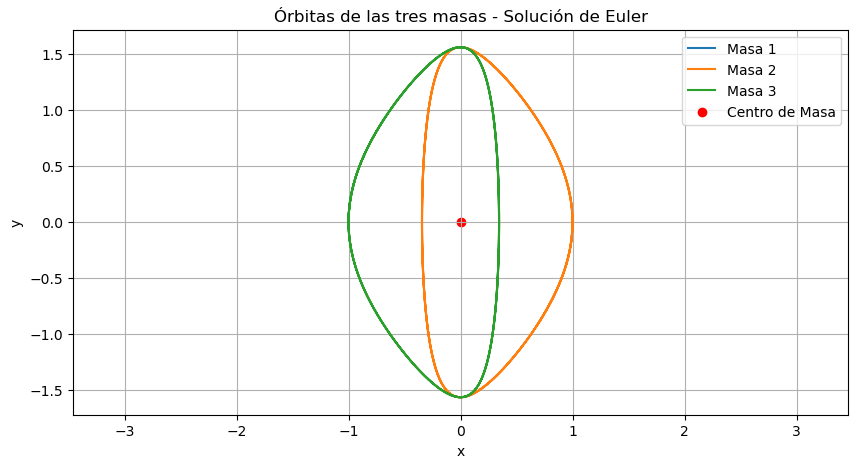

In [35]:
plt.figure(figsize=(10, 5))
plt.plot(x1_euler, y1_euler, label='Masa 1')
plt.plot(x2_euler, y2_euler, label='Masa 2')
plt.plot(x3_euler, y3_euler, label='Masa 3')
plt.scatter([0], [0], color='red', label='Centro de Masa')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Órbitas de las tres masas - Solución de Euler')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

## Lagrange

In [40]:
# Condiciones iniciales para la solución de Lagrange
v = 0.8
sn = np.sin(np.pi / 3)
cn = np.cos(np.pi / 3)
u0_lagrange = [1, 0, 0, v, -cn, -v * sn, sn, -v * cn, -cn, v * sn, -sn, -v * cn]
gm = 1

# Parámetros de integración
t0, tf, h = 0, 10, 0.01

In [42]:
t_lagrange, u_lagrange = rk4(lambda u, t: f(u, t, gm), u0_lagrange, t0, tf, h)

x1_lagrange, y1_lagrange = u_lagrange[:,0], u_lagrange[:,1]
x2_lagrange, y2_lagrange = u_lagrange[:,4], u_lagrange[:,5]
x3_lagrange, y3_lagrange = u_lagrange[:,8], u_lagrange[:,9]

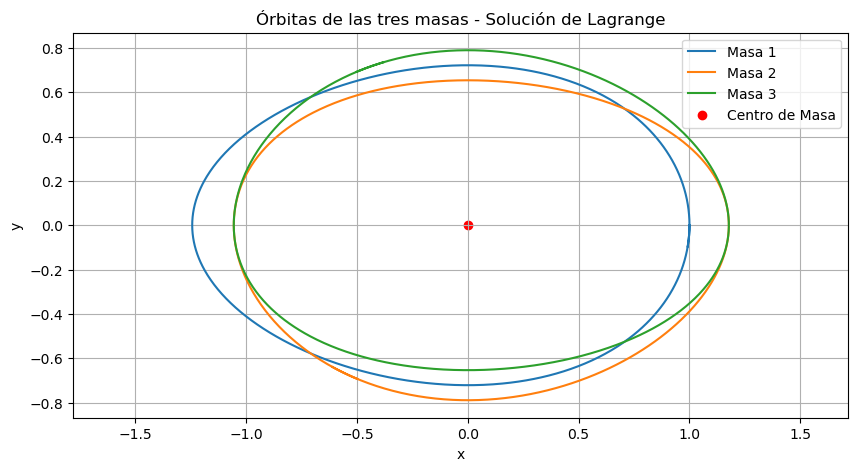

In [43]:
plt.figure(figsize=(10, 5))
plt.plot(x1_lagrange, y1_lagrange, label='Masa 1')
plt.plot(x2_lagrange, y2_lagrange, label='Masa 2')
plt.plot(x3_lagrange, y3_lagrange, label='Masa 3')
plt.scatter([0], [0], color='red', label='Centro de Masa')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Órbitas de las tres masas - Solución de Lagrange')
plt.legend()
plt.grid(True)
plt.axis('equal')
plt.show()

## Moore, Chenciner y Montgomery

In [44]:
# Condiciones iniciales
x1 = 0.97000436
y1 = -0.24308753
vx1 = -0.4662036850
vy1 = 0.4323657300
u0_montgomery = [
    -x1, vx1, y1, vy1,  # Masa 1
    x1, vx1, -y1, vy1,  # Masa 2
    0, -2*vx1, 0, -2*vy1  # Masa 3
]

# Parámetros de integración
t0, tf, h, gm = 0, 10, 0.01, 1

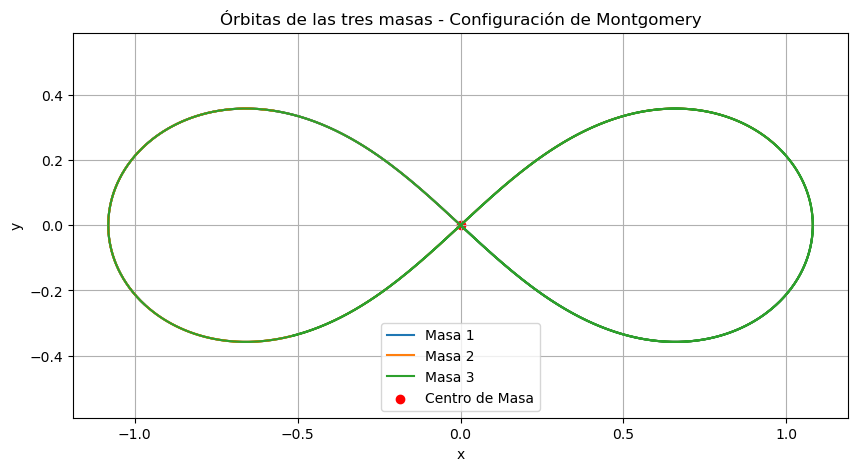

In [45]:
# Resolución y visualización
t_montgomery, u_montgomery = rk4(lambda u, t: f(u, t, gm), u0_montgomery, t0, tf, h)

def plot_solution(u, title):
    plt.figure(figsize=(10, 5))
    for i in range(0, len(u[0]), 4):
        plt.plot(u[:, i], u[:, i+2], label=f'Masa {i//4 + 1}')
    plt.scatter([0], [0], color='red', label='Centro de Masa')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.axis('equal')
    plt.show()

plot_solution(u_montgomery, 'Órbitas de las tres masas - Configuración de Montgomery')


# d)

In [47]:
def energia(u, gm):
    x1, vx1, y1, vy1, x2, vx2, y2, vy2, x3, vx3, y3, vy3 = u
    
    v1 = np.sqrt(vx1**2 + vy1**2)
    v2 = np.sqrt(vx2**2 + vy2**2)
    v3 = np.sqrt(vx3**2 + vy3**2)
    
    r12 = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
    r13 = np.sqrt((x1 - x3)**2 + (y1 - y3)**2)
    r23 = np.sqrt((x2 - x3)**2 + (y2 - y3)**2)
    
    E_cinetica = 0.5 * (v1**2 + v2**2 + v3**2)
    E_potencial = -gm * ((1/r12) + (1/r13) + (1/r23))
    E_total = E_cinetica + E_potencial
    
    return E_total

In [53]:
def graficar_energia(t, u, titulo, gm):
    energias = [energia(u[i], gm) for i in range(len(t))]
    plt.plot(t, energias, label=titulo)

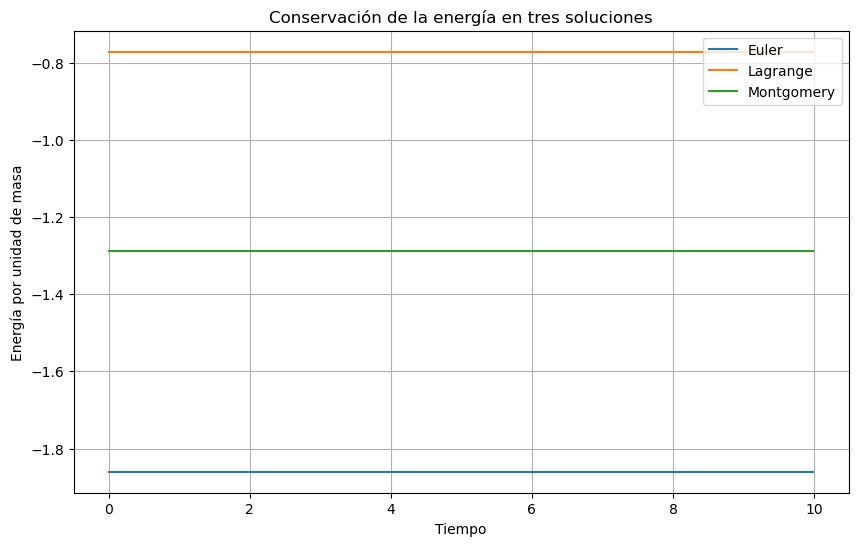

In [54]:
plt.figure(figsize=(10, 6))

graficar_energia(t_euler, u_euler, 'Euler', gm)
graficar_energia(t_lagrange, u_lagrange, 'Lagrange', gm)
graficar_energia(t_montgomery, u_montgomery, 'Montgomery', gm)

plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Energía por unidad de masa')
plt.title('Conservación de la energía en tres soluciones')
plt.grid(True)
plt.show()

# e)

In [55]:
def momento_angula(u):
    x1, vx1, y1, vy1, x2, vx2, y2, vy2, x3, vx3, y3, vy3 = u
    # Momento angular para cada cuerpo
    L1 = x1 * vy1 - y1 * vx1
    L2 = x2 * vy2 - y2 * vx2
    L3 = x3 * vy3 - y3 * vx3
    # Momento angular total
    L_total = L1 + L2 + L3
    return L_total

In [56]:
def graficar_momento_angular(t, u, titulo):
    momentos_angulares = [momento_angula(u[i]) for i in range(len(t))]
    plt.plot(t, momentos_angulares, label=titulo)

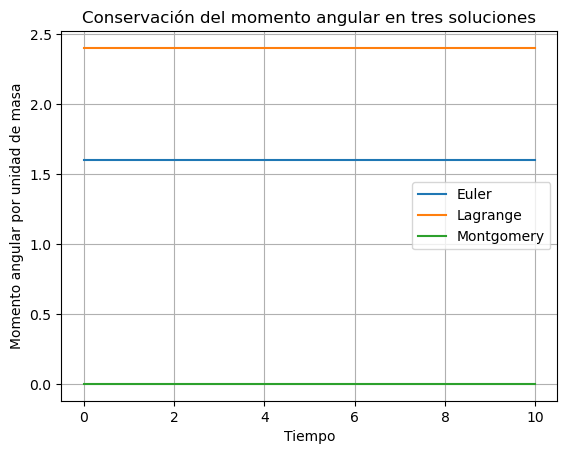

In [57]:
graficar_momento_angular(t_euler, u_euler, 'Euler')
graficar_momento_angular(t_lagrange, u_lagrange, 'Lagrange')
graficar_momento_angular(t_montgomery, u_montgomery, 'Montgomery')

plt.legend()
plt.xlabel('Tiempo')
plt.ylabel('Momento angular por unidad de masa')
plt.title('Conservación del momento angular en tres soluciones')
plt.grid(True)
plt.show()